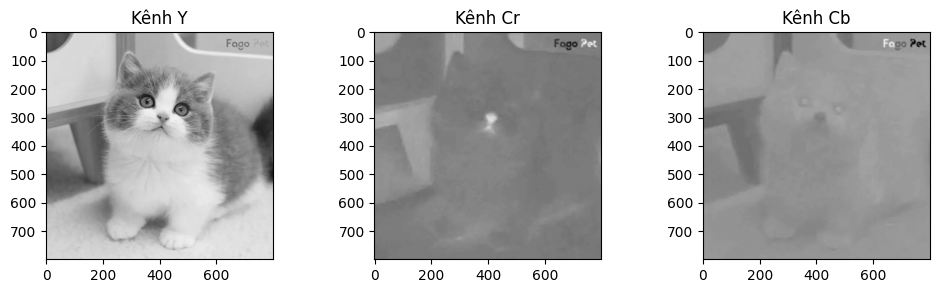

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

filename = 'meo.jpg'
img = cv2.imread(filename) 

base_name = os.path.splitext(filename)[0]

# Bilateral Filter
bilateral = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
cv2.imwrite(f'{base_name}_bilateral.jpg', bilateral)

# Canny Edge Detection
edges = cv2.Canny(img, threshold1=100, threshold2=200)
cv2.imwrite(f'{base_name}_edges.jpg', edges)

# Swap Blue and Green Channels
brg = img.copy()
brg[:, :, [0, 1]] = brg[:, :, [1, 0]]  # Swap B and G
cv2.imwrite(f'{base_name}_swapped.jpg', brg)

# Convert to YCrCb and split channels
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(ycrcb)

cv2.imwrite(f'{base_name}_Y.jpg', Y)
cv2.imwrite(f'{base_name}_Cr.jpg', Cr)
cv2.imwrite(f'{base_name}_Cb.jpg', Cb)

# Hiển thị 3 ảnh Y, Cr, Cb bằng matplotlib
plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
plt.imshow(Y, cmap='gray')
plt.title('Kênh Y')

plt.subplot(1, 3, 2)
plt.imshow(Cr, cmap='gray')
plt.title('Kênh Cr')

plt.subplot(1, 3, 3)
plt.imshow(Cb, cmap='gray')
plt.title('Kênh Cb')

plt.tight_layout()
plt.show()